## Python Assignment 3
Clustering Algorithm Impementation with k=2

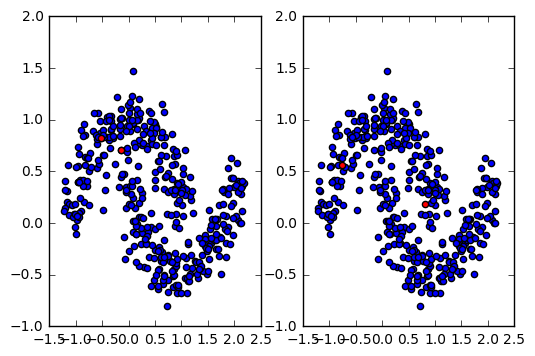

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Shuffling and selecting top 2 rows and assigning them as centroids
def init_centroids(data, k):
    centroids = data.copy()
    np.random.shuffle(centroids)
    return centroids[:k]

# Array of points with nearest centroid for each point
def closest_centroid(data, centroids):
    distances = np.sqrt(((data - centroids[:, np.newaxis])**2).sum(axis=2))
    return np.argmin(distances, axis=0)
    
#  Calculate new centroids with points closest to them
def shift_centroids(data, closest, centroids):
    return np.array([data[closest==k].mean(axis=0) for k in range(centroids.shape[0])])

# Reading the excel with data
data=pd.read_excel("moons.xlsx")[['X0','X1']].as_matrix()

# Initial Scatter plot with random centroids
plt.subplot(121)
co={'X0':'red','X1':'green'}
plt.scatter(data[:, 0], data[:, 1])
centroids = init_centroids(data, 2)
plt.scatter(centroids[:, 0], centroids[:, 1], c='r')


# Scatter plot after clustering
plt.subplot(122)
plt.scatter(data[:, 0], data[:, 1])
closest = closest_centroid(data, centroids)
centroids = shift_centroids(data, closest, centroids)
plt.scatter(centroids[:, 0], centroids[:, 1], c='r')